**LOADING THE DATASET**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/penguins_size.csv')

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


**Performing Visualization**

**i) Univariate Analysis**

<ipython-input-5-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

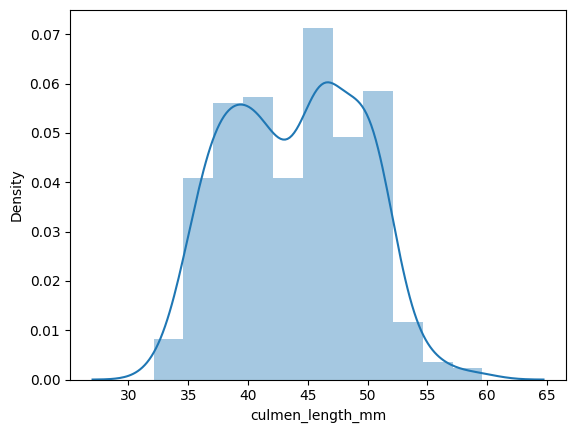

In [5]:
sns.distplot(df.culmen_length_mm)

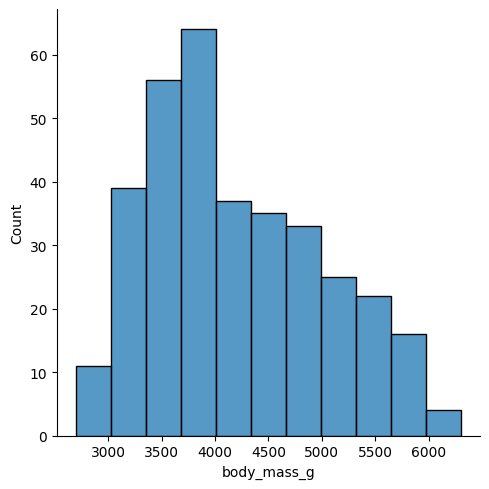

In [6]:
sns.displot(df.body_mass_g)

<Axes: ylabel='island'>

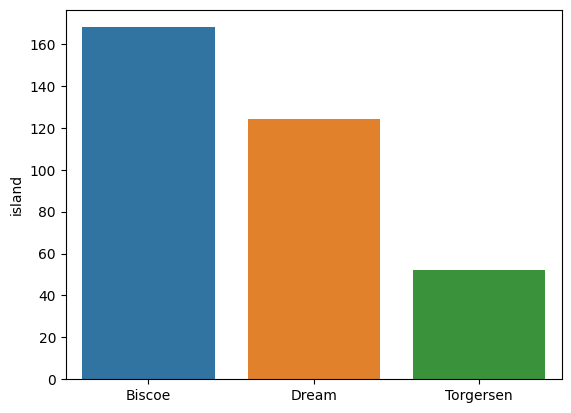

In [7]:
sns.barplot(x =df.island.value_counts().index,y =df.island.value_counts() )

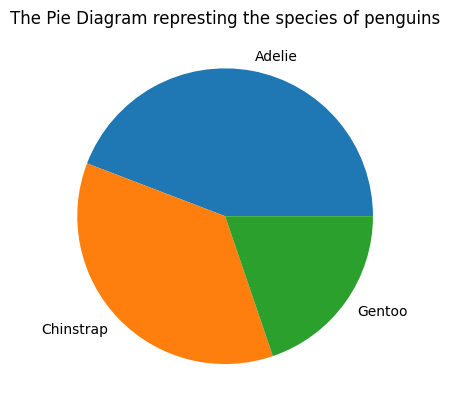

In [8]:
#PIE CHART
data = df.species.value_counts()
plt.pie(data,labels=['Adelie','Chinstrap','Gentoo'])
plt.title('The Pie Diagram represting the species of penguins')
plt.show()

**BIVARIATE ANALYSIS**

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

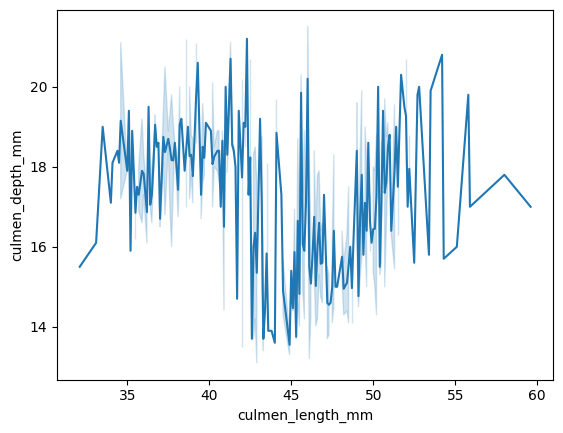

In [9]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

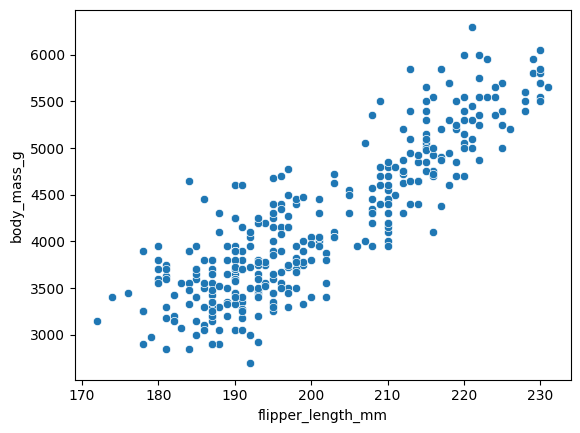

In [10]:
sns.scatterplot(x =df.flipper_length_mm ,y=df.body_mass_g)


**MULTIVARIATE ANALYSIS**

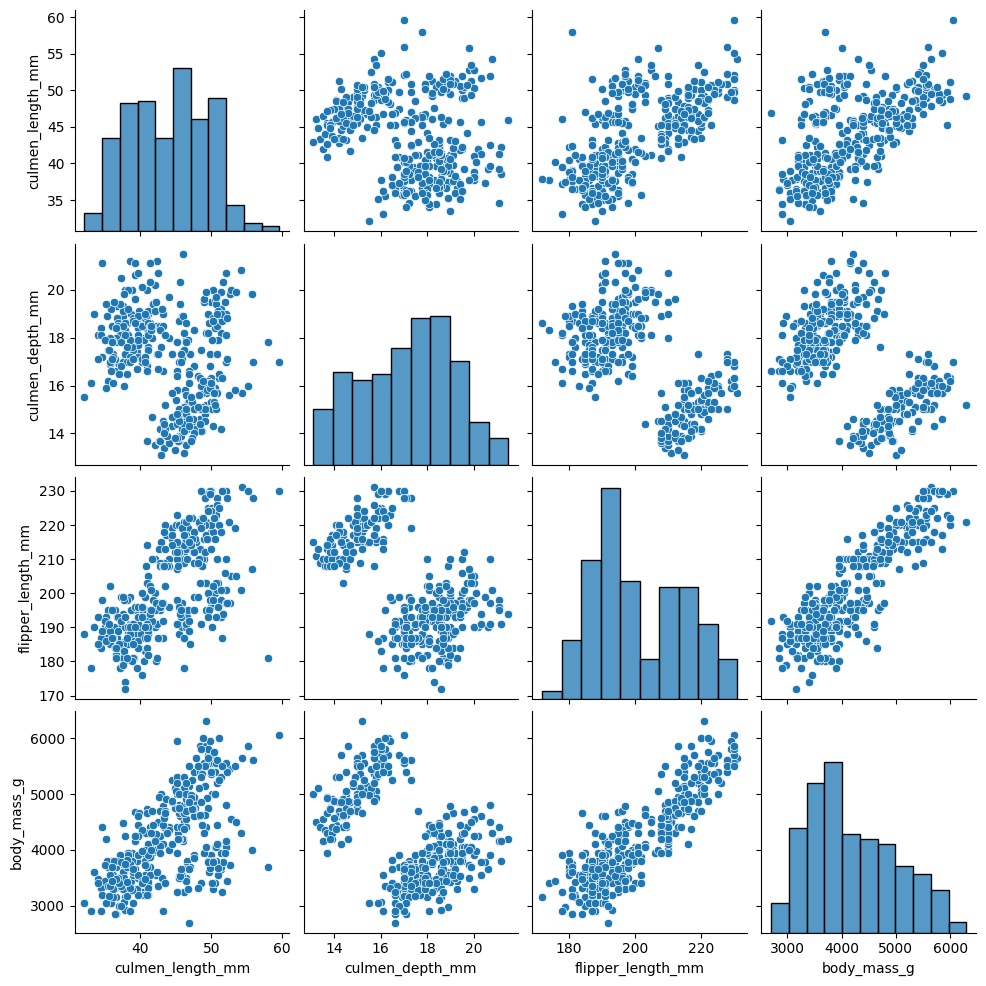

In [11]:
sns.pairplot(df)

<ipython-input-12-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

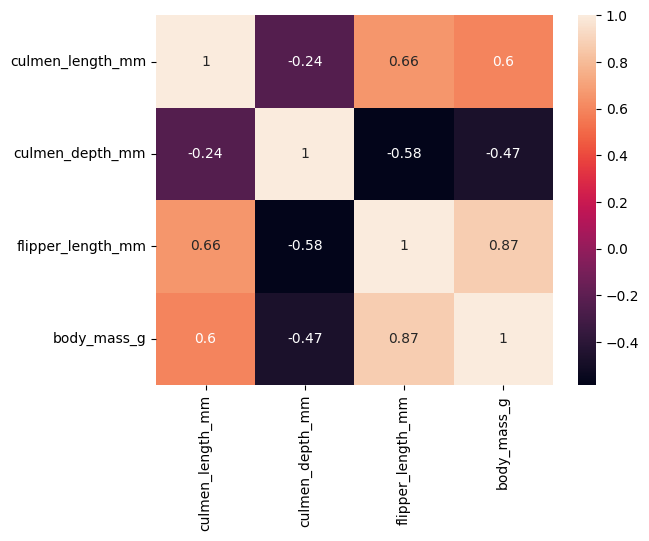

In [12]:
sns.heatmap(df.corr(),annot=True)

**PERFORMING DESCRPITIVE STATISTICS**

In [13]:
sts = df.describe()
sts

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Checking for Missing values and deal with them**

In [14]:
df.isnull().any()


species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [15]:
df.isnull().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [17]:
#using mode as sex is not numerical
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**FIND THE OUTLIERS AND REPLACE THE OUTLIERS**

<Axes: >

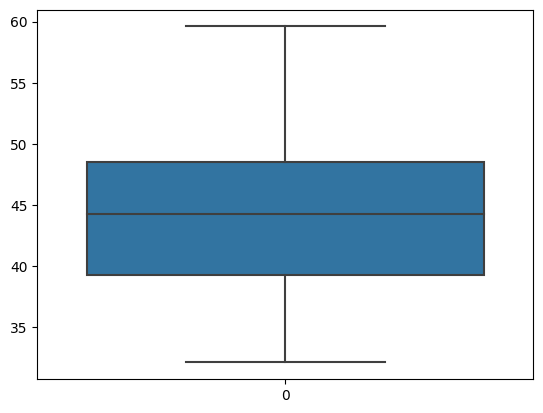

In [19]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

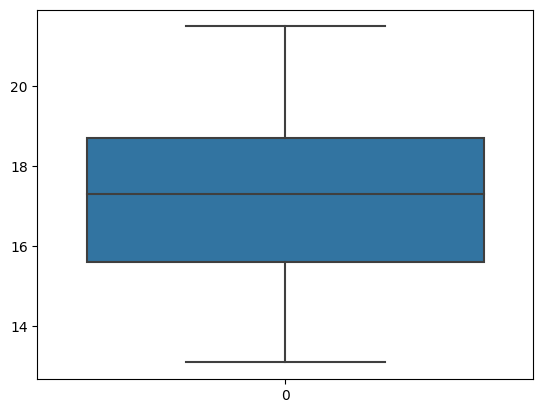

In [20]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

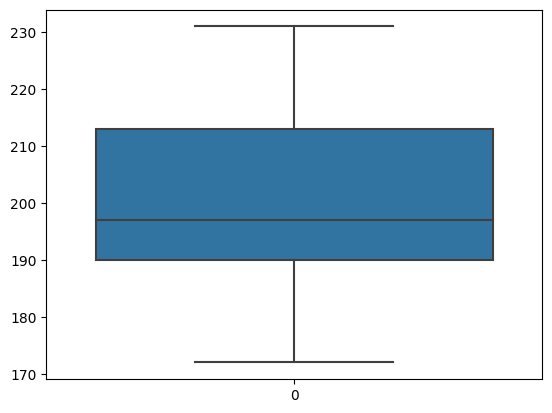

In [21]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

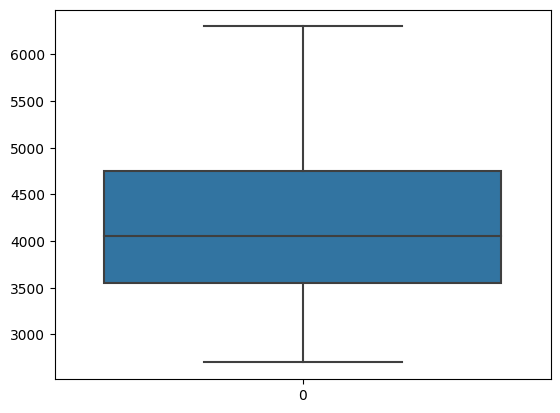

In [22]:
sns.boxplot(df.body_mass_g)

**Check the correlation of independent variables with the target**

In [34]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df.species = le.fit_transform(df.species)


In [38]:
df.corr().species.sort_values(ascending=False)

<ipython-input-38-767e6c1afa3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().species.sort_values(ascending=False)


species              1.000000
flipper_length_mm    0.851160
body_mass_g          0.747726
culmen_length_mm     0.728674
culmen_depth_mm     -0.741335
Name: species, dtype: float64

Check for Categorical columns and perform encoding.

In [41]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
# As u can see the catergorical Column are island and Sex
# NOTE: The species was already been encoded in prevoius code

In [42]:
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)

In [43]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1


In [44]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,1
341,2,0,50.40000,15.70000,222.000000,5750.000000,2
342,2,0,45.20000,14.80000,212.000000,5200.000000,1
343,2,0,49.90000,16.10000,213.000000,5400.000000,2


**Split the data into dependent and independent variables**

In [45]:
X =df.drop(columns =['species'],axis =1)
Y =df.species

**Scaling the data**

In [47]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
scaled_x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


**Split the data into training and testing**

In [50]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,Y,test_size = 0.2,random_state = 1)

**check the training and testing data shape**.

In [51]:
x_train.shape

(275, 6)

In [52]:
x_test.shape

(69, 6)